This is the linear regression exercise. First we will implement the algorithm from scratch. Then we will implement it using a widely used library in python- Scikit Learn aka Sklearn. Note that this assignment is relatively lengthy, but nevertheless, do not be discouraged!

# Data preprocessing 

In [12]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will be using the Boston housing dataset, a dataset containing details of houses in Boston. We will be using a subset of the actual dataset, which is easily available from sklearn. We will not be performing any exploratory data analysis as it is an extremely simple dataset with no null values and can easily be stored as numpy arrays instead of panda dataframes

In [13]:
from sklearn.datasets import load_boston
X , y = load_boston(return_X_y = True)
y = y.reshape(506,1)
print(X.shape, y.shape)

(506, 13) (506, 1)


Note that m = number of training examples = 506
and n = number of features = 13. 



Next we will split our dataset into a training set and testing set, a must do process in ML. We train our data using only the training test, and test our predictions on the testing set. Here we have divided the data into training and test sets in a 2:1 ratio. For more information check out

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Data Standardization 

Next we will be performing an operation called data standardization. This basically converts the data roughly into a normal distribution so that gradient descent converges to its global minimum faster. Note that you might've seen this in prob stats :D

In [15]:
""" Standardization of data. We subtract the mean from each feature and then 
      divide it by the standard deviation
"""
mu =   np.mean(X_train,axis=0) #ADD CODE HERE to calculate mean OF EACH FEATURE OR COLUMN of the training set. Hint: use numpy
sigma = np.std(X_train,axis=0) #ADD CODE HERE to calculate standard deviation OF EACH FEATURE of the training set
X_train =  (X_train-mu)/sigma   #Subtract mean from training data and then divide by standard deviation
X_test =  (X_test-mu)/sigma    #Subtract mean from testing data and then divide by standard deviation

In [16]:
X_train.shape

(339, 13)

# Parameter Initialization

Now we will intialize the X matrix and theta vector

In [58]:
m = y_train.shape[0]

def initialize_params(X):
  ones =  np.ones((m,1))#Numpy array of ones of size m x 1. This is the bias X0 = 1 which we add 
  X_new = np.hstack((ones,X))#Horizontally stack the bias vector to the beginning of the X matrix
  theta = np.zeros((X_new.shape[1],1))#Numpy array of zeros. See theory to check dimensions
  return X_new , theta

In [59]:
X_train, theta = initialize_params(X_train)

In [60]:
X_train.shape


(339, 14)

## Prediction using y=wx+b

In [44]:
m = y_train.shape[0]

def params(X):
  w = np.zeros((1,X_train.shape[1]))
  b = np.ones((1,m))
  return w,b

In [45]:
w,b = params(X_train)

In [46]:
print(X_train.shape)
print(w.shape)
print(b.shape)

(339, 13)
(1, 13)
(1, 339)


In [47]:
y_train.shape

(339, 1)

# Cost function

Cost function using theta

In [61]:
def compute_cost(theta, X, y):

  J = 1/(2*m) * np.sum( ((X@theta-y))**2 )
  return J

In [62]:
#If all code is correct you should see a cost of around 307.9
compute_cost(theta, X_train, y_train)

307.9009292035398

Cost function using w,b

In [50]:
def compute_cost(X, y,w,b):

  J = np.sum((X@w.T+b.T-y)**2)
  J = J/(2*m)
  return J

In [51]:
compute_cost(X_train, y_train,w,b)



285.43013274336283

# Gradient Descent 


The gradient update rule for each parameter is :

![alt text](https://miro.medium.com/max/880/1*CkcmVCUKmbA-qUn7y8srNQ.png)

However , if we use a for loop, computation is really slow. Therefore we used a vectorized version of the gradient update rule which is :

![alt text](https://drive.google.com/uc?id=17LwD2Tse6w4j4hKCZF33B0ao6yqdzeqD)

Gradient descent using theta

In [63]:
def gradient_descent(X, y, theta, learning_rate, n_iters):
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
      J_history[i] = compute_cost(theta, X, y)
      theta = theta - (learning_rate/m) * X.T @ (X @ theta - y) 
        

    return (J_history, theta)

In [64]:
(J_history, theta) = gradient_descent(X_train, y_train, theta, 0.1, 50)

Gradient descent using w,b

In [58]:
def gradient_descent(X, y, w,b, learning_rate, n_iters):
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
      J_history[i] = compute_cost(X, y,w,b)
      w_new = w - (learning_rate/m)*(np.sum(X.T@((X@w.T)+b.T-y)))
      b_new = b - (learning_rate/m)*np.sum((w@X.T+b-y.T))
      w = w_new
      b = b_new  

    return J_history

# Fitting the model and predictions 

In [59]:
(J_history) = gradient_descent(X_train,y_train,w,b,0.1,100)#Call the gradient descent function with the training data, with a learning rate of 0.1, for 50 iterations

In [60]:
print(J_history) #If all code is correct, the last value of the cost should be around 11.795

[[285.43013274]
 [239.36711716]
 [202.02270082]
 [171.74125782]
 [147.18170648]
 [127.2577466 ]
 [111.08945166]
 [ 97.96405843]
 [ 87.30420656]
 [ 78.64221266]
 [ 71.59923225]
 [ 65.86838094]
 [ 61.20106256]
 [ 57.39589493]
 [ 54.28973976]
 [ 51.75043677]
 [ 49.67091842]
 [ 47.96444273]
 [ 46.56073191]
 [ 45.40284461]
 [ 44.44464247]
 [ 43.64873794]
 [ 42.98483208]
 [ 42.42836812]
 [ 41.95944086]
 [ 41.56191322]
 [ 41.22270074]
 [ 40.93119187]
 [ 40.67877854]
 [ 40.4584758 ]
 [ 40.2646138 ]
 [ 40.09258822]
 [ 39.93865816]
 [ 39.79978236]
 [ 39.67348665]
 [ 39.55775642]
 [ 39.4509496 ]
 [ 39.35172621]
 [ 39.25899118]
 [ 39.17184809]
 [ 39.08956169]
 [ 39.01152753]
 [ 38.93724734]
 [ 38.86630911]
 [ 38.7983709 ]
 [ 38.73314778]
 [ 38.67040118]
 [ 38.60993035]
 [ 38.5515653 ]
 [ 38.49516124]
 [ 38.44059392]
 [ 38.38775593]
 [ 38.33655374]
 [ 38.28690514]
 [ 38.23873737]
 [ 38.19198541]
 [ 38.14659073]
 [ 38.10250018]
 [ 38.05966515]
 [ 38.01804083]
 [ 37.97758568]
 [ 37.93826089]
 [ 37.90

Text(0, 0.5, 'Cost')

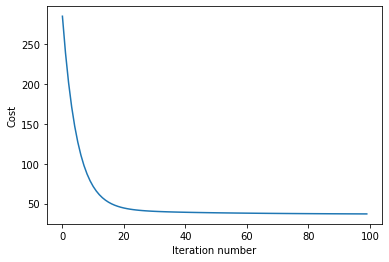

In [61]:
plt.plot(range(len(J_history)), J_history)
plt.xlabel('Iteration number')
plt.ylabel('Cost')

Observe that the cost decreases rapidly at first then slows down.After the 30th iteration, there isn't much change. So training for too many iterations after 30 iterations doesn't make sense.

In [138]:
from sklearn.metrics import mean_squared_error
X_test = np.hstack((np.ones((X_test.shape[0],1)) , X_test))
y_pred = X_test @ theta
print(0.5 * mean_squared_error(y_pred, y_test))

11.05982521984101


Great! Our loss on the test set is low as well. This means we have trained a pretty good model. Note that many times, the training loss will be very low while the test loss be relatively high. This is a problem known as ***overfitting*** that we will discuss later

# Linear Regression Using Scikit Learn

Phew! All the code above can be written in just a couple of lines using scikit learn! For this section, we leave it up to you to google the code and write it on your own

In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
linear_model = LinearRegression() #Create a linear regression object off the LinearRegression class

#Now use the fit() method of the model on the training data below


In [54]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [55]:
#Use the predict function to get the predictions of the test and training data

yPred_train = linear_model.predict(X_train)
yPred_test = linear_model.predict(X_test)

In [56]:
print("Training loss = " + str(0.5 * mean_squared_error(yPred_train, y_train)))
print("Test loss = " + str(0.5 * mean_squared_error(yPred_test, y_test)))

#If code is right you should see training loss of around 11.49 and test loss of 11.19

Training loss = 11.492507920150404
Test loss = 10.362011718669908


Awesome! Our model from scratch performs almost as good as the one from scikit learn. Remember that we use scikit learn extensively for ML algorithms, however, we have implemented it from scratch for the sake of understanding, which is crucial

Congratulations on completing your first machine learning algorithm!